### Logistic Regression

#### Problem statement- To predict whether a student will get admitted or not based on hi/her two exam scores.
#### Given data - exam score of two exams

In [1]:
import os  

import numpy as np  
import pandas as pd 
 
import matplotlib.pyplot as plt  
%matplotlib inline

### Load the data

In [2]:
path = 'ex2data1.txt'  
data = pd.read_csv(path, names=['Exam 1', 'Exam 2', 'Admitted'])  
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# general summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam 1      100 non-null float64
Exam 2      100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


### Plot the data

Text(0, 0.5, 'Exam 2 Score')

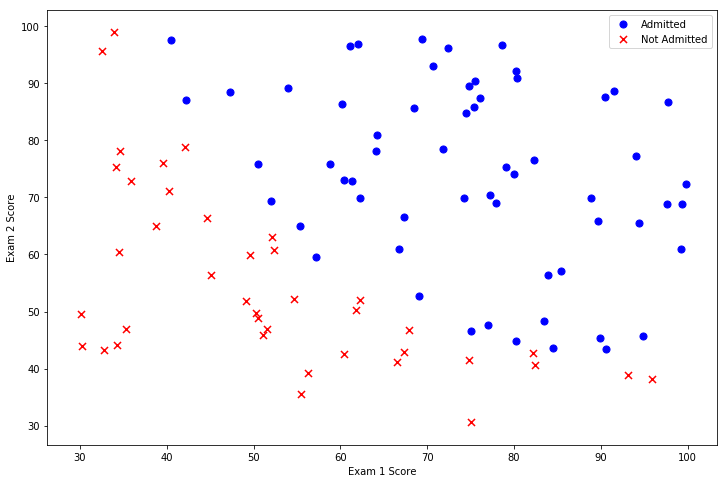

In [4]:
positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam 1      100 non-null float64
Exam 2      100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [6]:
data.dtypes

Exam 1      float64
Exam 2      float64
Admitted      int64
dtype: object

In [7]:
print (data.shape)

(100, 3)


In [8]:
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

In [56]:
X_data = np.array(X.values)
X = np.array(X.values)
y = np.array(y.values)
print ('data_shape: ',X.shape)
print ('label_shape:',y.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [10]:
max_x1 = np.max(X[:,0])
max_x2 = np.max(X[:,1])
print (max_x1,max_x2)

99.82785779692128 98.86943574220612


In [11]:
X[0:10]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331]])

In [12]:
y[0:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [13]:
X[:,0]=X[:,0]/max_x1

In [14]:
X[:,1]=X[:,1]/max_x2

In [15]:
X[0:10]

array([[0.34683364, 0.78916899],
       [0.30338937, 0.44396933],
       [0.35909224, 0.73735829],
       [0.60286378, 0.87295484],
       [0.79169019, 0.76205933],
       [0.45161019, 0.56960345],
       [0.61212036, 0.97615026],
       [0.75154118, 0.47086355],
       [0.76230011, 0.88420217],
       [0.84578415, 0.44031194]])

### Hypothesis Function

In [16]:
w1=0
w2=0
b=0
#z = w1*x1 + w2*x2 + b
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [28]:
res_1 = sigmoid(0)
res_2 = sigmoid(10)
res_3 = sigmoid(-10)
print ('sigmoid(0): ', res_1)
print ('sigmoid(10): ', res_2)
print ('sigmoid(-10): ', res_3)

sigmoid(0):  0.5
sigmoid(10):  0.9999546021312976
sigmoid(-10):  4.5397868702434395e-05


Text(0, 0.5, '$g(X)$')

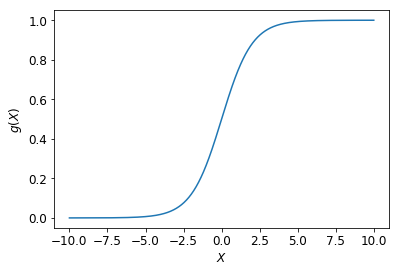

In [29]:
xx = np.linspace(-10, 10, 1000)
# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$X$')
plt.ylabel(r'$g(X)$')

In [30]:
def log_reg_model(w,b,x):
    w1=w[0]
    w2=w[1]
    x1=x[0]
    x2=x[1]
    z = w1*x1 + w2*x2 + b
    a = sigmoid(z)
    return a

### Loss Function

In [31]:
def compute_loss(y, a):
    loss = (-y * np.log(a) - (1 - y) * np.log(1 - a))
    return loss

In [32]:
def compute_grad(x,y,a):
    x1 = x[0]
    x2 = x[1]
    dw1 = x1*(a - y)
    dw2 = x2*(a-y)
    db = (a-y)
    return dw1,dw2,db

In [33]:
print (X.shape)
print (y.shape)

(100, 2)
(100, 1)


### Gradient Descent

In [34]:
num_samples=X.shape[0]
def gradient_descent(X, Y,w_init,b_init, alpha, iters,saving_interval):  
    w1=w_init[0]
    w2=w_init[1]
    b=b_init
    cost = np.zeros(iters)
    w_list=[]
    b_list=[]
    for i in range(iters):
        cost_fn=0
        grad_w1=0
        grad_w2=0
        grad_b=0
        for n in range(num_samples):
            y_pred = log_reg_model([w1,w2],b,X[n])
            loss = compute_loss(Y[n],y_pred)
            cost_fn += loss
            dw1,dw2,db=compute_grad(X[n],Y[n],y_pred)
            grad_w1 += dw1
            grad_w2 += dw2
            grad_b += db            
        grad_w1 = grad_w1/num_samples
        grad_w2 = grad_w2/num_samples
        grad_b = grad_b/num_samples
        cost_fn = cost_fn/num_samples
        print('cost: ',cost_fn)
        #print ('weight bias: ',w,b)
        #theta = temp
        cost[i] = cost_fn
        w1 = w1-alpha*grad_w1
        w2 = w2-alpha*grad_w2
        b = b-alpha*grad_b
        if i%saving_interval==0:
            print ('saving')
            w_list.append([w1,w2])
            b_list.append(b)
    return w_list,b_list,cost

In [234]:
w_init=[0,0]
b_init=0
num_iter=1000
saving_at=100
lr=0.01
w_val,b_val,cost = gradient_descent(X,y,w_init,b_init, lr, num_iter,saving_at)

cost:  [0.69314718]
saving
cost:  [0.69277352]
cost:  [0.69240315]
cost:  [0.69203605]
cost:  [0.69167218]
cost:  [0.69131151]
cost:  [0.69095402]
cost:  [0.69059966]
cost:  [0.69024842]
cost:  [0.68990026]
cost:  [0.68955515]
cost:  [0.68921307]
cost:  [0.68887398]
cost:  [0.68853786]
cost:  [0.68820467]
cost:  [0.6878744]
cost:  [0.68754702]
cost:  [0.68722248]
cost:  [0.68690078]
cost:  [0.68658188]
cost:  [0.68626575]
cost:  [0.68595237]
cost:  [0.68564172]
cost:  [0.68533376]
cost:  [0.68502847]
cost:  [0.68472583]
cost:  [0.68442581]
cost:  [0.68412838]
cost:  [0.68383352]
cost:  [0.68354121]
cost:  [0.68325143]
cost:  [0.68296414]
cost:  [0.68267932]
cost:  [0.68239696]
cost:  [0.68211702]
cost:  [0.68183949]
cost:  [0.68156434]
cost:  [0.68129154]
cost:  [0.68102108]
cost:  [0.68075294]
cost:  [0.68048709]
cost:  [0.68022351]
cost:  [0.67996217]
cost:  [0.67970306]
cost:  [0.67944616]
cost:  [0.67919144]
cost:  [0.67893889]
cost:  [0.67868848]
cost:  [0.67844019]
cost:  [0.6781

cost:  [0.64605258]
cost:  [0.64602039]
cost:  [0.64598828]
cost:  [0.64595622]
cost:  [0.64592424]
cost:  [0.64589232]
cost:  [0.64586046]
cost:  [0.64582866]
cost:  [0.64579693]
cost:  [0.64576526]
cost:  [0.64573366]
cost:  [0.64570211]
cost:  [0.64567062]
cost:  [0.6456392]
cost:  [0.64560783]
cost:  [0.64557653]
cost:  [0.64554528]
cost:  [0.64551409]
cost:  [0.64548296]
cost:  [0.64545188]
cost:  [0.64542086]
cost:  [0.6453899]
cost:  [0.64535899]
cost:  [0.64532814]
cost:  [0.64529735]
cost:  [0.6452666]
cost:  [0.64523592]
cost:  [0.64520528]
cost:  [0.6451747]
cost:  [0.64514417]
cost:  [0.64511369]
cost:  [0.64508326]
cost:  [0.64505289]
cost:  [0.64502256]
cost:  [0.64499229]
cost:  [0.64496206]
cost:  [0.64493188]
cost:  [0.64490176]
cost:  [0.64487168]
cost:  [0.64484165]
cost:  [0.64481167]
cost:  [0.64478173]
cost:  [0.64475184]
cost:  [0.644722]
cost:  [0.6446922]
cost:  [0.64466245]
cost:  [0.64463275]
cost:  [0.64460308]
cost:  [0.64457347]
cost:  [0.6445439]
cost:  [

cost:  [0.63485326]
cost:  [0.634829]
cost:  [0.63480474]
cost:  [0.63478049]
cost:  [0.63475624]
cost:  [0.63473199]
cost:  [0.63470775]
cost:  [0.63468351]
cost:  [0.63465927]
cost:  [0.63463504]
cost:  [0.63461081]
cost:  [0.63458658]
cost:  [0.63456236]
cost:  [0.63453814]
cost:  [0.63451393]
cost:  [0.63448972]
cost:  [0.63446551]
cost:  [0.6344413]
cost:  [0.6344171]
cost:  [0.6343929]
cost:  [0.63436871]
cost:  [0.63434452]
cost:  [0.63432033]
cost:  [0.63429614]
cost:  [0.63427196]
cost:  [0.63424778]
cost:  [0.63422361]
cost:  [0.63419944]
cost:  [0.63417527]
cost:  [0.63415111]
cost:  [0.63412694]
cost:  [0.63410279]
cost:  [0.63407863]
cost:  [0.63405448]
cost:  [0.63403033]
cost:  [0.63400618]
cost:  [0.63398204]
cost:  [0.6339579]
cost:  [0.63393377]
cost:  [0.63390964]
cost:  [0.63388551]
cost:  [0.63386138]
cost:  [0.63383726]
cost:  [0.63381314]
cost:  [0.63378902]
cost:  [0.63376491]
cost:  [0.6337408]
cost:  [0.63371669]
cost:  [0.63369258]
cost:  [0.63366848]
cost:  

Text(0.5, 1.0, 'Error vs. Training Epoch')

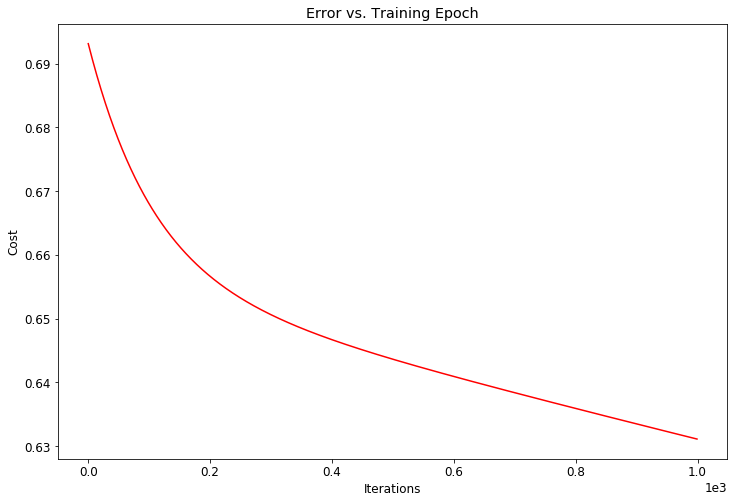

In [235]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(num_iter), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [236]:
print ('before training')
print ('weight:{0} , bias:{1}'.format(w_init,b_init))
print ('after training')
print ('weight:{0} , bias:{1}'.format(w_val[-1],b_val[-1]))

before training
weight:[0, 0] , bias:0
after training
weight:[array([0.4551879]), array([0.39043898])] , bias:[-0.02162931]


### Prediction after training

In [245]:
def predict_probs(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)
def predict_class(X, weights, threshold=0.5):
    pred_probs = predict_probs(X, weights)
    index = 0
    for p in pred_probs:
        if p >= threshold:
            pred_probs[index] = 1
        else:
            pred_probs[index] = 0
        index +=1
    return pred_probs

In [246]:
y_test_predicted = predict_probs(X[0:5],w_val[-1])
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y[0:5])

predicted_value:  [[0.61443582]
 [0.57723722]
 [0.61095965]
 [0.6491379 ]
 [0.65878972]]
true_value:  [[0]
 [0]
 [0]
 [1]
 [1]]


In [247]:
y_test_predicted_cls = predict_class(X[0:5],w_val[-1],threshold=0.6)

print ('predicted_class: ', y_test_predicted_cls)
print ('true_class: ', y[0:5])

predicted_class:  [[1.]
 [0.]
 [1.]
 [1.]
 [1.]]
true_class:  [[0]
 [0]
 [0]
 [1]
 [1]]


In [259]:
def compute_accuracy(predicted_cls, actual_cls):
    true_pred = 0
    count = 0
    for p in predicted_cls:
        if int(p[0]) == actual_cls[count][0]:
            true_pred += 1
        count +=1
    accuracy = (true_pred/count)*100
    print ("test accuracy: ", accuracy)

In [260]:
compute_accuracy(y_test_predicted_cls, y)

test accuracy:  60.0
